# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 1 </span>   


### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font>Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

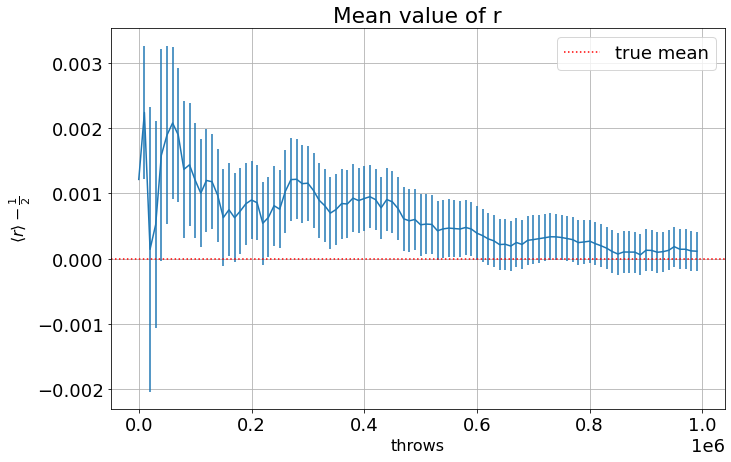

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

media, varianza =np.loadtxt("Data1_1", unpack =True, usecols=(0,1), delimiter=",")

M=1000000   #number of total throws
N=100       #nuber of blocks
L=int(M/N)  #number of throws in each block

x=np.arange(N)
x*=L

plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"]= (11,7)
plt.errorbar(x, media-0.5, yerr=varianza)
plt.xlabel("throws", fontsize=16)
plt.ylabel(r'$\langle r \rangle - \frac{1}{2}$', fontsize=16)
plt.axhline(y=0., linestyle='dotted', label='true mean', color='r')
plt.legend()
plt.grid(True)
plt.title('Mean value of r')
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font>Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

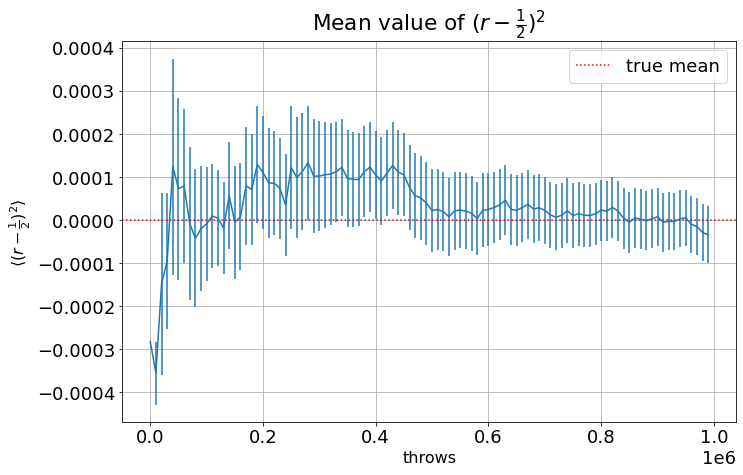

In [7]:
media, varianza =np.loadtxt("Data1_2", unpack =True, usecols=(0,1), delimiter=",")

x=np.arange(N)
x*=L

plt.errorbar(x, media-1/12, yerr=varianza)
plt.xlabel("throws", fontsize=16)
plt.ylabel(r'$\langle (r - \frac{1}{2})^2\rangle $', fontsize=16)
plt.axhline(y=0., linestyle='dotted', label='true mean', color='r')
plt.legend()
plt.grid(True)
plt.title(r'Mean value of $(r-\frac{1}{2})^2$')
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

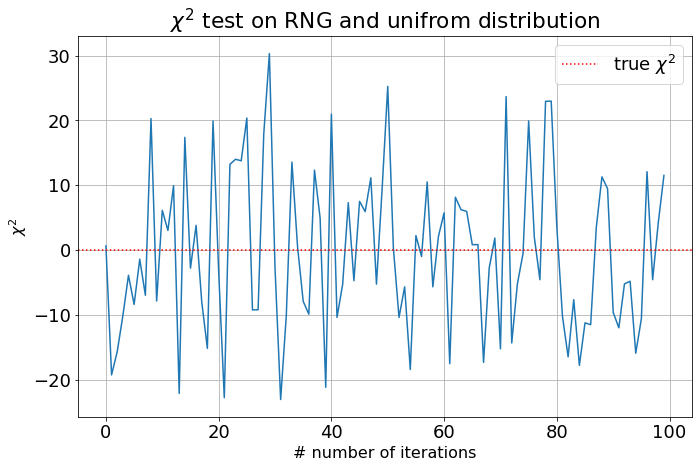

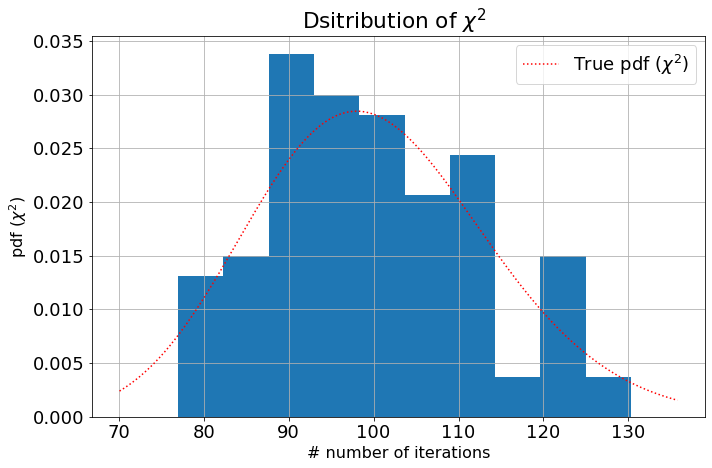

In [31]:
import scipy.stats as sp

chi_quadro=np.loadtxt("Data1_3", unpack =True)

Mchi=100
nchi=10000
Lchi=int(Mchi/nchi)
iterations=100

x=np.arange(iterations)



plt.plot(x, chi_quadro-100) 
plt.xlabel("# number of iterations", fontsize=16)
plt.ylabel(r'$\chi^2$', fontsize=16)
plt.axhline(y=0., linestyle='dotted', label='True $\chi^2$', color='r')
plt.legend()
plt.grid(True)
plt.title(r'$\chi^2$ test on RNG and unifrom distribution' )
plt.show()

x_histo=np.linspace(sp.chi2.ppf(0.01, 100), sp.chi2.ppf(0.99, 100), 1000)
plt.hist(chi_quadro, density=True)
plt.plot(x_histo, sp.chi2.pdf(x_histo,100), color="red",linestyle='dotted', label='True distribution(
plt.ylabel(r'pdf ($\chi^2$)', fontsize=16)
plt.legend()
plt.grid(True)
plt.title(r'Dsitribution of $\chi^2$  ')
plt.show()
